In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
messi = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo B/images/messi5.jpg")

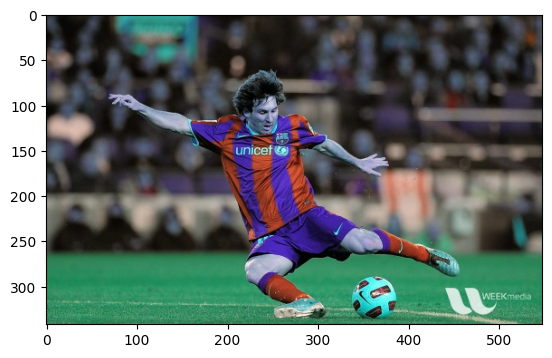

In [3]:
plt.imshow(messi)
plt.show()

In [7]:
# Buena praxis es:
PI = 3.14151926
print(PI)
PI = "Hola mundo"
print(PI)

3.14151926
Hola mundo


In [8]:
# BGR a RGB
# BGR2RGB
print(cv.COLOR_BGR2RGB)

4


In [11]:
# MATLAB: ORIGEN 2 DESTINO
# rgb2gray()
# OpenCV: CODE (ORIGEN 2 DESTINO)
# cv.cvtColor(IMG, CODE)

messi_rgb = cv.cvtColor(messi, cv.COLOR_BGR2RGB)

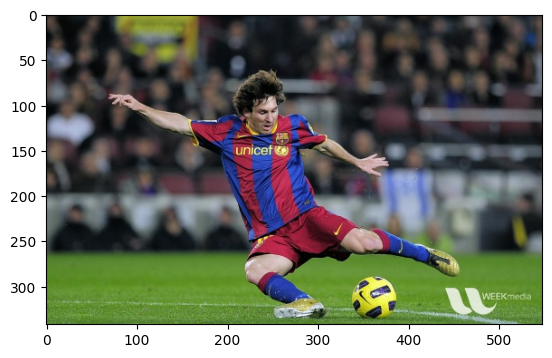

In [12]:
plt.imshow(messi_rgb)
plt.show()

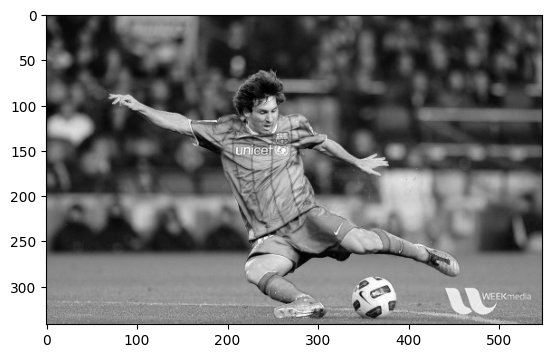

In [16]:
messi_hsv = cv.cvtColor(messi_rgb, cv.COLOR_RGB2HSV)
h, s, v = cv.split(messi_hsv)
plt.imshow(v, cmap="gray")
plt.show()

---
HSV (Hue, Saturation, Value) ---- HSB (Hue, Saturation, Brightness)<br>
YCbCr (Y guarda brillo)<br>

Algoritmo para mejora de contraste en imágenes HSV

1) Cargar la imagen (BGR)
2) Convertir a HSV
3) Separar los canales en H, S, V
4) Ecualizar el canal del brillo (V)
5) Merge (juntar) a los canales con el canal ecualizado -> HSV
6) Regresar al espacio original (BGR)
7) (opcional) mostrar la imagen

In [22]:
def mejorarContrasteHSV(img, mostrar=False):
    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) # 2
    h, s, v = cv.split(img_hsv) # 3
    v_eq = cv.equalizeHist(v) # 4
    img_hs_veq = cv.merge((h, s, v_eq)) # 5
    img_eq = cv.cvtColor(img_hs_veq, cv.COLOR_HSV2BGR) # 6
    if mostrar: # 7
        plt.imshow(img_eq[:, :, ::-1])
        plt.show()

    return img_eq

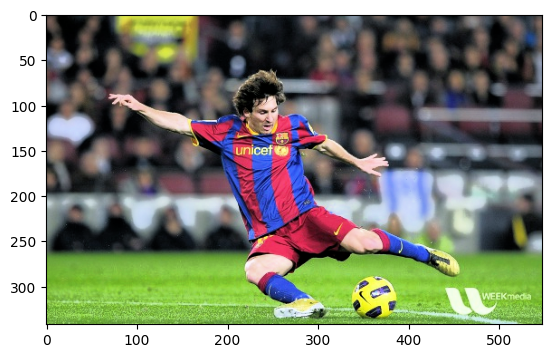

In [24]:
messi_eq = mejorarContrasteHSV(messi, mostrar=True) 

In [25]:
lena_bgr = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo B/images/lena.jpg")

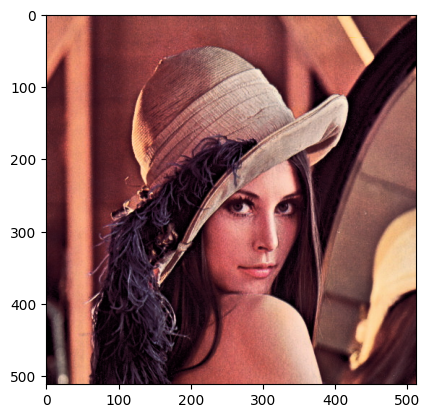

In [26]:
lena_eq = mejorarContrasteHSV(lena_bgr, True)

---
HSV (Hue, Saturation, Value) ---- HSB (Hue, Saturation, Brightness)<br>
YCbCr (Y guarda brillo)<br>

Algoritmo para mejora de contraste en imágenes YCbCr

1) Cargar la imagen (BGR)
2) Convertir a YCbCr
3) Separar los canales en Y, Cb, Cr
4) Ecualizar el canal del brillo (Y)
5) Merge (juntar) a los canales con el canal ecualizado -> YCbCr
6) Regresar al espacio original (BGR)
7) (opcional) mostrar la imagen

In [27]:
def mejorarContrasteYCbCr(img, mostrar=False):
    img_ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb) # 2
    y, cr, cb = cv.split(img_ycrcb) # 3
    y_eq = cv.equalizeHist(y) # 4
    img_yeq_crcb = cv.merge((y_eq, cr, cb)) # 5
    img_eq = cv.cvtColor(img_yeq_crcb, cv.COLOR_YCrCb2BGR) # 6
    if mostrar: # 7
        plt.imshow(img_eq[:, :, ::-1])
        plt.show()

    return img_eq

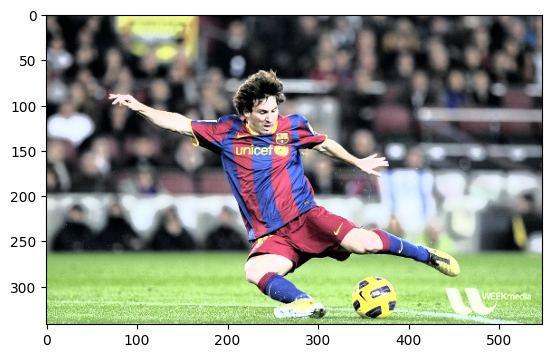

In [28]:
messi_eq = mejorarContrasteYCbCr(messi, True)

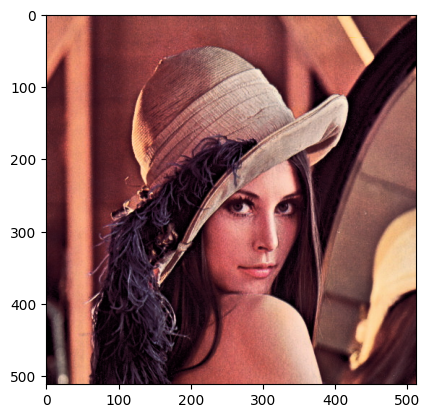

In [29]:
lena_eq = mejorarContrasteHSV(lena_bgr, True)

TAREA:
1) Colocar la imagen original junto a la imagen ecualizada (YCbCr y HSV)
2) Mostrar los histogramas antes y después de ecualizar (Y y V)